# Image Classification

## 1. Get the data

In [1]:
import zipfile 
from pathlib import Path

In [3]:
import zipfile
from pathlib import Path
import shutil

# Setup paths
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
existing_zip_path = Path("C:/Users/yashs/data/pizza_steak_sushi_50_percent.zip")  # Use raw string or forward slashes

# If the image folder doesn't exist, prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Check if the existing zip file is present
    if existing_zip_path.is_file():
        print(f"Found existing zip file at {existing_zip_path}, copying it...")
        
        # Copy the zip file to our desired data path
        destination_zip_path = data_path / "pizza_steak_sushi.zip"
        shutil.copy(existing_zip_path, destination_zip_path)
        
        # Unzip the data
        with zipfile.ZipFile(destination_zip_path, "r") as zip_ref:
            print("Unzipping pizza, steak, sushi data...") 
            zip_ref.extractall(image_path)
        
        # Optionally remove the copied zip file if you don't need it
        # destination_zip_path.unlink()
    else:
        print(f"Error: Could not find existing zip file at {existing_zip_path}")
        # You could add the original download code here as a fallback



data\pizza_steak_sushi directory exists.


In [5]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi.
There are 3 directories and 0 images in data\pizza_steak_sushi\test.
There are 0 directories and 120 images in data\pizza_steak_sushi\test\pizza.
There are 0 directories and 134 images in data\pizza_steak_sushi\test\steak.
There are 0 directories and 121 images in data\pizza_steak_sushi\test\sushi.
There are 3 directories and 0 images in data\pizza_steak_sushi\train.
There are 0 directories and 386 images in data\pizza_steak_sushi\train\pizza.
There are 0 directories and 380 images in data\pizza_steak_sushi\train\steak.
There are 0 directories and 359 images in data\pizza_steak_sushi\train\sushi.


In [7]:
# Setup train and testing paths 
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize an image

Random image path: data\pizza_steak_sushi\train\sushi\2570036.jpg
Image class: sushi
Image height: 512
Image width: 512


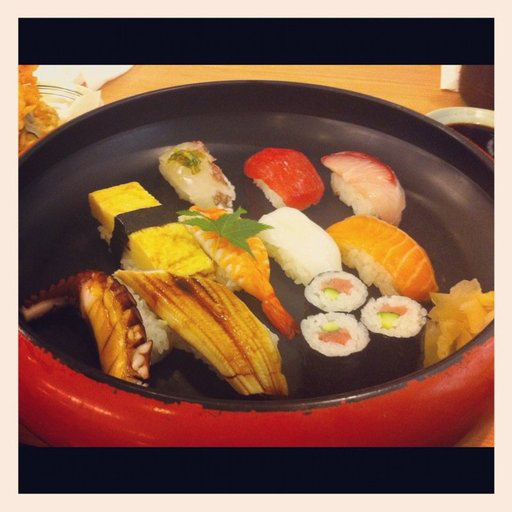

In [10]:
import random 
from PIL import Image

# set seed
random.seed(42)

# 1. Get all image paths (* means 'any combination')
image_path_list = list(image_path.glob('*/*/*.jpg'))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name 
image_class = random_image_path.parent.stem

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

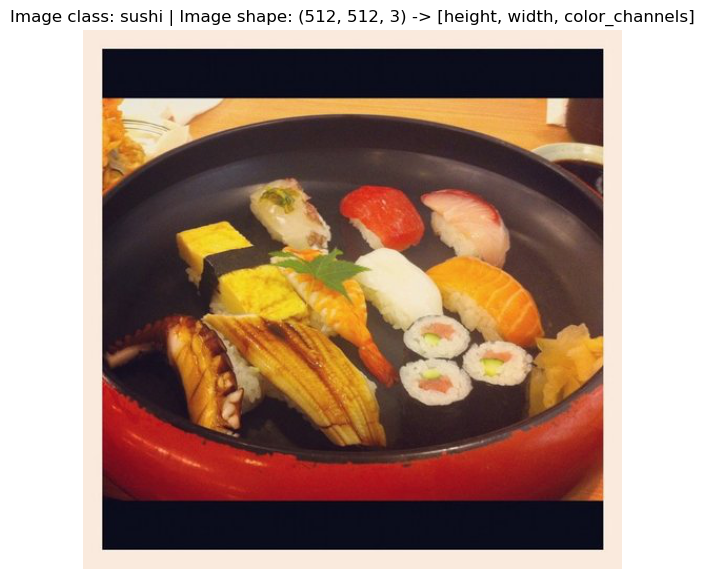

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## 3. Tranforming data

In [14]:
import torch 
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

In [15]:
# Write transform for image 
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])

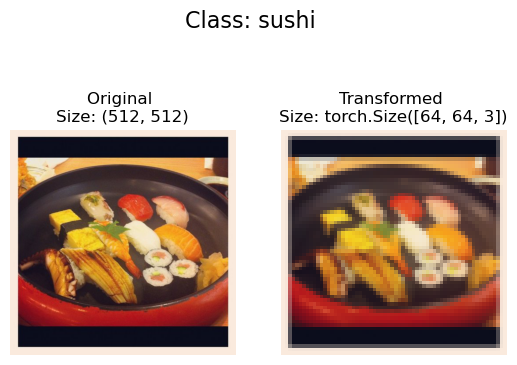

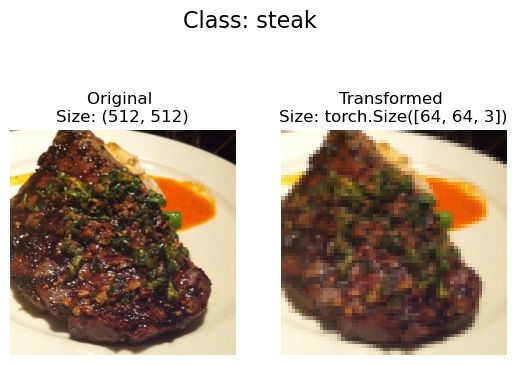

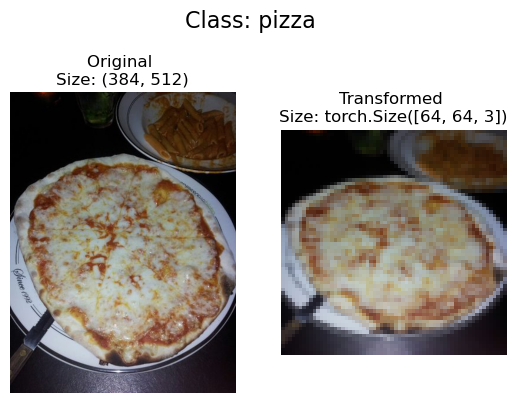

In [17]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)
            

### 4. Loading image data using ImageFolder

In [22]:
from torchvision import datasets 
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, 
                                transform=data_transform,
                                target_transform=None)

print(train_data, test_data)

Dataset ImageFolder
    Number of datapoints: 1125
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) Dataset ImageFolder
    Number of datapoints: 375
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [24]:
# Get class names as a list 
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [26]:
# can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [28]:
# Check the lengths 
len(train_data), len(test_data)

(1125, 375)

In [30]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1765, 0.2118, 0.2471,  ..., 0.1490, 0.2392, 0.2196],
         [0.2314, 0.1490, 0.1137,  ..., 0.1804, 0.2784, 0.2549],
         [0.4353, 0.3804, 0.2275,  ..., 0.2157, 0.2549, 0.2824],
         ...,
         [0.4431, 0.3412, 0.2196,  ..., 0.2706, 0.5098, 0.5373],
         [0.4549, 0.4471, 0.3412,  ..., 0.3608, 0.5020, 0.5020],
         [0.4392, 0.4627, 0.4510,  ..., 0.4078, 0.4588, 0.4510]],

        [[0.1922, 0.2275, 0.2627,  ..., 0.1647, 0.2588, 0.2314],
         [0.2471, 0.1608, 0.1255,  ..., 0.1922, 0.2980, 0.2627],
         [0.4588, 0.4000, 0.2431,  ..., 0.2275, 0.2745, 0.2902],
         ...,
         [0.4980, 0.3765, 0.2157,  ..., 0.2706, 0.5490, 0.5843],
         [0.5137, 0.5020, 0.3725,  ..., 0.3765, 0.5373, 0.5373],
         [0.4980, 0.5176, 0.5059,  ..., 0.4275, 0.4784, 0.4745]],

        [[0.1451, 0.1804, 0.2157,  ..., 0.1098, 0.1765, 0.1490],
         [0.1961, 0.1216, 0.0980,  ..., 0.1333, 0.2078, 0.1765],
         [0.3490, 0.3059, 0.1843,  ..., 0.15

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


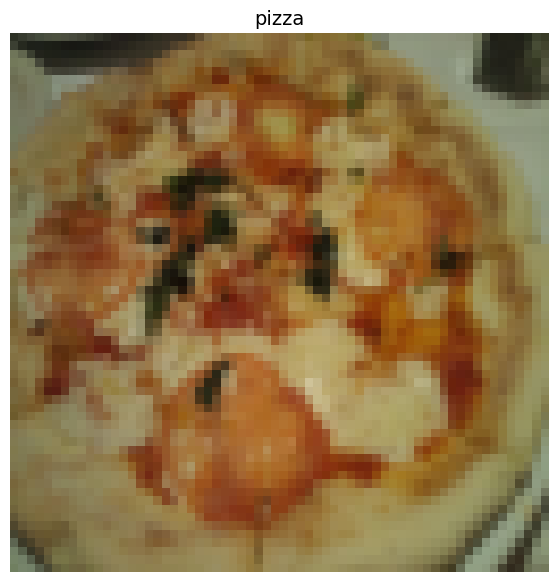

In [32]:
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

#### 4.1 Turn loaded images into DataLoader's 

In [35]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x256a00a5930>,
 <torch.utils.data.dataloader.DataLoader at 0x256a00a63b0>)

In [37]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [38]:
# 1. Take in a Dataset as well as a list of class names
from typing import List
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

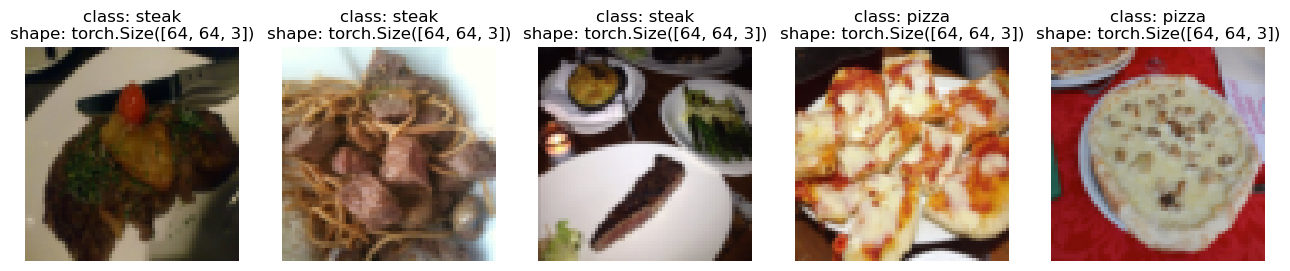

In [39]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

## 5. Model Building

### 5.1 Model 0: TinyVGG without data augmentation

### 5.2 Creating transforms and loading data for Model 0

In [43]:
# Create simple transform 
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [44]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 12 workers.


(<torch.utils.data.dataloader.DataLoader at 0x256a0762b00>,
 <torch.utils.data.dataloader.DataLoader at 0x256a0760d90>)

### 5.3 Create TinyVGG model class

In [46]:
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1,
                     stride=1),
            nn.ReLU(),
            nn.MaxPool2d(stride=2, kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                     kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                     out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 5.4 Try a forward pass on a sinlge image (to test the model)

In [54]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0594, 0.0592, 0.0382]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3357, 0.3356, 0.3287]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
2


### 5.5 Use torchinfo to get an idea of the shapes going through our model

In [56]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo


In [57]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 5.6 Create train and test loop functions

In [62]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              ):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # Calc and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
    # Adjust metrics to get average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 5.7 Creating a train() function to combine train_step() and test_step()

In [237]:
def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
         epochs: int = 5,
         scheduler=None):  # <-- Optional scheduler
    results = {'train_loss': [],
              'train_acc': [],
              'test_loss': [],
              'test_acc': []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn)

        if scheduler is not None:
            scheduler.step()  # Update learning rate

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f} | "
            f"lr: {optimizer.param_groups[0]['lr']:.6f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results


### 5.8 Train and Evaluate Model 0:

In [116]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1050 | train_acc: 0.3177 | test_loss: 1.0919 | test_acc: 0.4089
Epoch: 2 | train_loss: 1.0945 | train_acc: 0.3925 | test_loss: 1.0574 | test_acc: 0.5130
Epoch: 3 | train_loss: 0.9395 | train_acc: 0.5309 | test_loss: 0.8863 | test_acc: 0.5648
Epoch: 4 | train_loss: 0.8889 | train_acc: 0.5858 | test_loss: 0.8706 | test_acc: 0.6279
Epoch: 5 | train_loss: 0.8552 | train_acc: 0.6095 | test_loss: 0.8424 | test_acc: 0.6232
Epoch: 6 | train_loss: 0.8144 | train_acc: 0.6481 | test_loss: 0.8541 | test_acc: 0.5887
Epoch: 7 | train_loss: 0.7996 | train_acc: 0.6451 | test_loss: 0.8168 | test_acc: 0.6450
Epoch: 8 | train_loss: 0.7893 | train_acc: 0.6658 | test_loss: 0.8233 | test_acc: 0.6382
Epoch: 9 | train_loss: 0.7370 | train_acc: 0.6802 | test_loss: 0.8043 | test_acc: 0.6548
Epoch: 10 | train_loss: 0.7115 | train_acc: 0.7019 | test_loss: 0.7898 | test_acc: 0.6710
Total training time: 242.788 seconds


In [70]:
device 

'cuda'

### 5.9 Plot the loss curves of Model 0

In [118]:
from typing import Dict
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

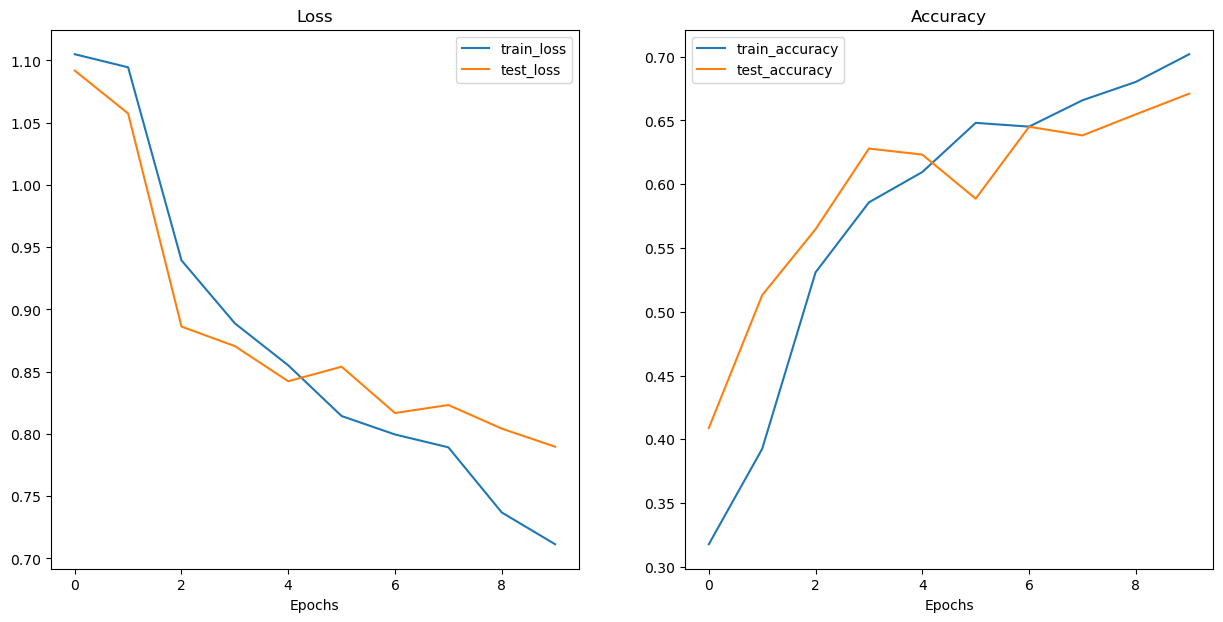

In [120]:
plot_loss_curves(model_0_results)

#### Loss is going down. it seems like if i train it for few more iterations it will go down we'll see that later.

## 6. Experiments

### Experiment 1: Data Augmentation

#### Create transform with data augmentation

In [122]:
# Create training transform with TrivialAugment
train_transform_augmented = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

#### Create train and test dataset's and dataloader's 

In [125]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_augmented)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 1125
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 375
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [127]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x256c5953d60>,
 <torch.utils.data.dataloader.DataLoader at 0x256a00a63b0>)

#### Construct and train Model 1

In [130]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [134]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0944 | train_acc: 0.3609 | test_loss: 1.0741 | test_acc: 0.4187
Epoch: 2 | train_loss: 1.0194 | train_acc: 0.5042 | test_loss: 0.9011 | test_acc: 0.5827
Epoch: 3 | train_loss: 0.9345 | train_acc: 0.5549 | test_loss: 0.8920 | test_acc: 0.5744
Epoch: 4 | train_loss: 0.9040 | train_acc: 0.5734 | test_loss: 0.9341 | test_acc: 0.5164
Epoch: 5 | train_loss: 0.8991 | train_acc: 0.5766 | test_loss: 0.8693 | test_acc: 0.5926
Epoch: 6 | train_loss: 0.8593 | train_acc: 0.5974 | test_loss: 0.8668 | test_acc: 0.6300
Epoch: 7 | train_loss: 0.8385 | train_acc: 0.6151 | test_loss: 0.8633 | test_acc: 0.6300
Epoch: 8 | train_loss: 0.8442 | train_acc: 0.6153 | test_loss: 0.8540 | test_acc: 0.6419
Epoch: 9 | train_loss: 0.8273 | train_acc: 0.6286 | test_loss: 0.8459 | test_acc: 0.6439
Epoch: 10 | train_loss: 0.8150 | train_acc: 0.6252 | test_loss: 0.8302 | test_acc: 0.6663
Total training time: 243.363 seconds


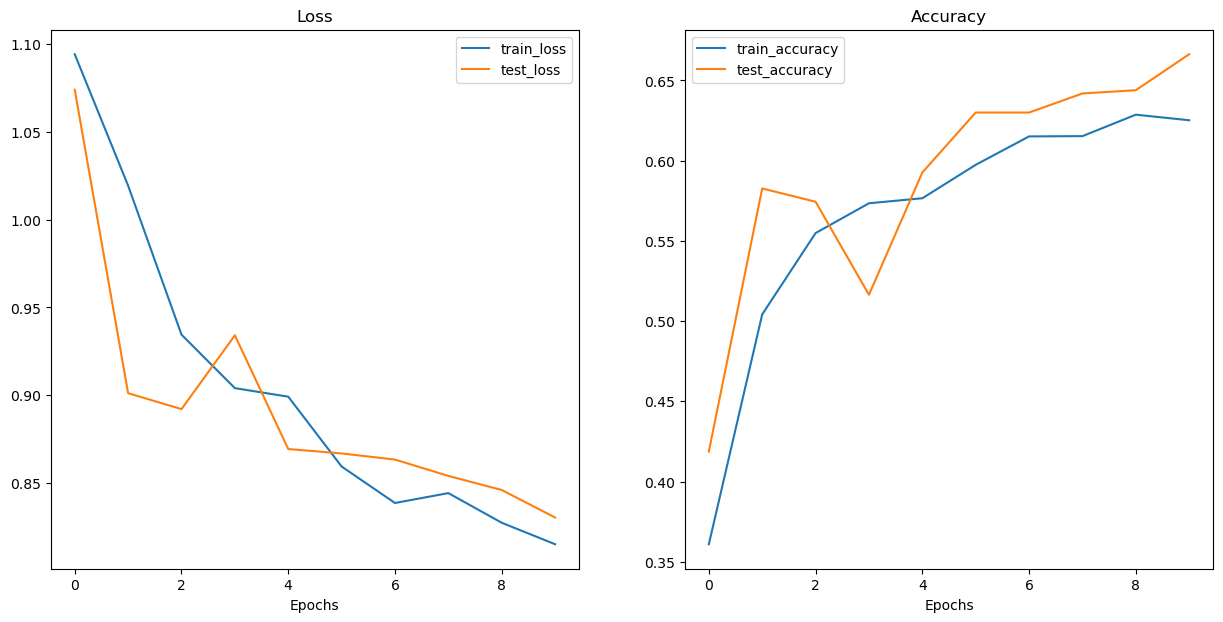

In [136]:
plot_loss_curves(model_1_results)

Insights:
1. Generalization:

- Model B (with augmentation) had slightly lower train accuracy but comparable test accuracy.

- This means augmentation helped prevent overfitting and kept performance steady on unseen data.

2. Overfitting Check:

- Without augmentation, there's a noticeable gap between training and test accuracy (70.2% vs 67.1%), suggesting mild overfitting.

- With augmentation, the model generalizes better — smaller gap (62.5% vs 66.6%).

3. Stability:

- Augmented model starts slower but becomes more stable by Epoch 6 onward.

- Despite lower train accuracy, test accuracy keeps improving, which is what we want in real-world deployment.

Conclusion:
- Hypothesis confirmed: Augmentation improves generalization by reducing overfitting.

Now that we've established a baseline with augmentation, let's proceed!

### Experiment 2: Dropout vs Batch Normalization
- Hypothesis: Batch Norm provides better convergence and stability compared to dropout in this image classification task.

#### Model 2: With Dropout only

In [149]:
class TinyVGG_Dropout(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))



In [156]:
# Set seeds again
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Create model_2
torch.manual_seed(42)
model_2 = TinyVGG_Dropout(input_shape=3,
                          hidden_units=10,
                          output_shape=len(train_data.classes)).to(device)
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)



# Train model_2
start_time = timer()
model_2_results = train(model=model_2, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time for model_2: {end_time-start_time:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1064 | train_acc: 0.3424 | test_loss: 1.0962 | test_acc: 0.3490
Epoch: 2 | train_loss: 1.0071 | train_acc: 0.4535 | test_loss: 1.0247 | test_acc: 0.5421
Epoch: 3 | train_loss: 0.9261 | train_acc: 0.5457 | test_loss: 0.9620 | test_acc: 0.5622
Epoch: 4 | train_loss: 0.9011 | train_acc: 0.5840 | test_loss: 0.9531 | test_acc: 0.5540
Epoch: 5 | train_loss: 0.8884 | train_acc: 0.5771 | test_loss: 0.9610 | test_acc: 0.5456
Epoch: 6 | train_loss: 0.8799 | train_acc: 0.5873 | test_loss: 0.9723 | test_acc: 0.5863
Epoch: 7 | train_loss: 0.8932 | train_acc: 0.6009 | test_loss: 0.9620 | test_acc: 0.5832
Epoch: 8 | train_loss: 0.8585 | train_acc: 0.6095 | test_loss: 0.9370 | test_acc: 0.5932
Epoch: 9 | train_loss: 0.8439 | train_acc: 0.6247 | test_loss: 0.9143 | test_acc: 0.6175
Epoch: 10 | train_loss: 0.8379 | train_acc: 0.6252 | test_loss: 0.9249 | test_acc: 0.6227
Total training time for model_2: 247.431 seconds


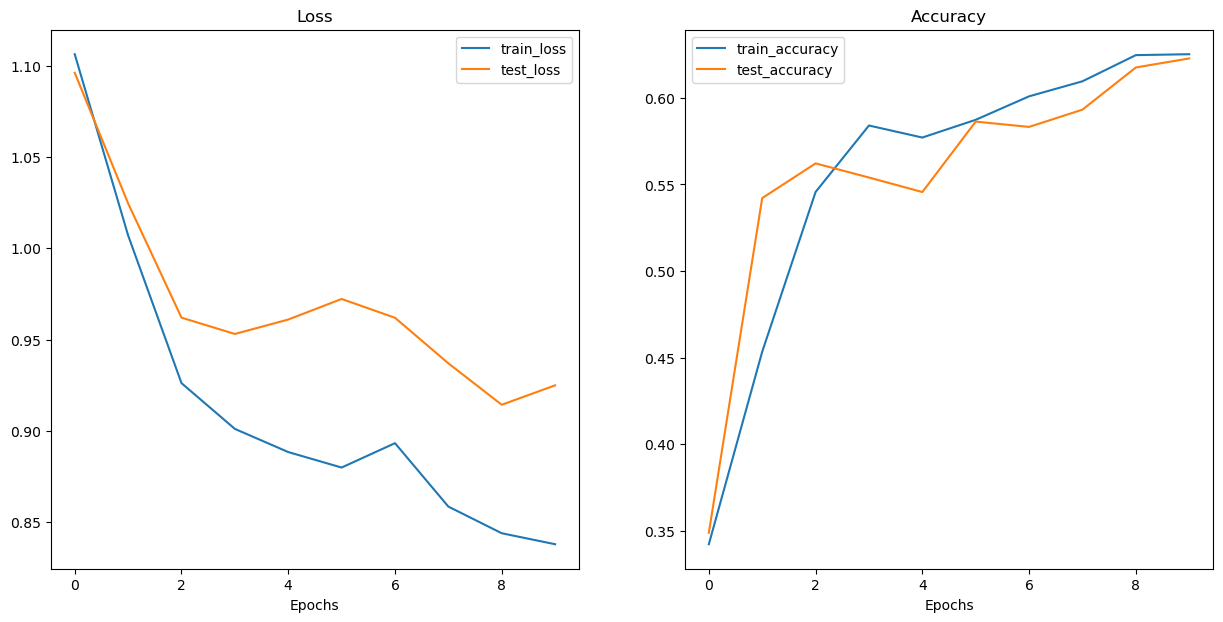

In [160]:
plot_loss_curves(model_2_results)

Observation: Dropout helped prevent overfitting and gave a decent generalization bump. Let’s now see if BatchNorm can stabilize and speed up training further.

#### Model 3: With BatchNorm Only4

In [164]:
class TinyVGG_BatchNorm(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

# Create model_3
torch.manual_seed(42)
model_3 = TinyVGG_BatchNorm(input_shape=3,
                            hidden_units=10,
                            output_shape=len(train_data.classes)).to(device)


In [166]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.001)

start_time = timer()
model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time for model_3: {end_time-start_time:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0289 | train_acc: 0.4979 | test_loss: 0.8767 | test_acc: 0.5786
Epoch: 2 | train_loss: 0.8503 | train_acc: 0.6247 | test_loss: 0.8165 | test_acc: 0.6373
Epoch: 3 | train_loss: 0.8469 | train_acc: 0.6425 | test_loss: 0.7976 | test_acc: 0.6430
Epoch: 4 | train_loss: 0.8451 | train_acc: 0.6243 | test_loss: 0.8118 | test_acc: 0.6690
Epoch: 5 | train_loss: 0.8560 | train_acc: 0.6295 | test_loss: 0.7725 | test_acc: 0.6540
Epoch: 6 | train_loss: 0.7699 | train_acc: 0.6625 | test_loss: 0.7129 | test_acc: 0.7100
Epoch: 7 | train_loss: 0.7278 | train_acc: 0.6993 | test_loss: 0.8150 | test_acc: 0.6546
Epoch: 8 | train_loss: 0.7383 | train_acc: 0.6799 | test_loss: 0.7517 | test_acc: 0.6976
Epoch: 9 | train_loss: 0.7216 | train_acc: 0.6972 | test_loss: 0.7168 | test_acc: 0.7095
Epoch: 10 | train_loss: 0.6982 | train_acc: 0.6984 | test_loss: 0.7336 | test_acc: 0.7132
Total training time for model_3: 254.880 seconds


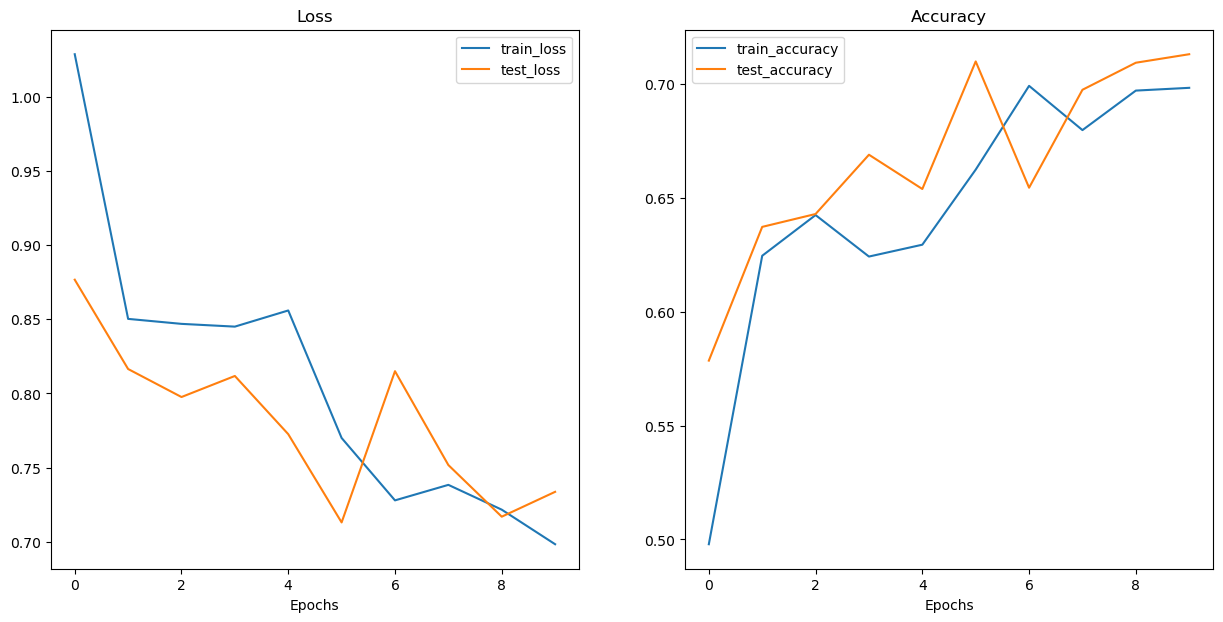

In [168]:
plot_loss_curves(model_3_results)

Batch Normalization helped faster convergence, higher accuracy, and better generalization than just Dropout.

In [171]:
class TinyVGG_BatchNorm_Dropout(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)  # Dropout after first pool
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)  # Dropout after second pool
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

# Create model_4
torch.manual_seed(42)
model_4 = TinyVGG_BatchNorm_Dropout(input_shape=3,
                                    hidden_units=10,
                                    output_shape=len(train_data.classes)).to(device)


In [173]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_4.parameters(), lr=0.001)

start_time = timer()
model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time for model_4: {end_time-start_time:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1354 | train_acc: 0.4646 | test_loss: 0.9243 | test_acc: 0.5546
Epoch: 2 | train_loss: 0.9212 | train_acc: 0.5986 | test_loss: 0.7943 | test_acc: 0.6472
Epoch: 3 | train_loss: 0.8890 | train_acc: 0.6049 | test_loss: 0.7778 | test_acc: 0.6617
Epoch: 4 | train_loss: 0.8496 | train_acc: 0.6278 | test_loss: 0.7530 | test_acc: 0.6799
Epoch: 5 | train_loss: 0.8814 | train_acc: 0.6212 | test_loss: 0.7775 | test_acc: 0.6809
Epoch: 6 | train_loss: 0.7812 | train_acc: 0.6585 | test_loss: 0.7029 | test_acc: 0.6940
Epoch: 7 | train_loss: 0.7462 | train_acc: 0.6845 | test_loss: 0.7568 | test_acc: 0.6763
Epoch: 8 | train_loss: 0.7524 | train_acc: 0.6924 | test_loss: 0.7360 | test_acc: 0.6954
Epoch: 9 | train_loss: 0.7645 | train_acc: 0.6833 | test_loss: 0.6803 | test_acc: 0.7381
Epoch: 10 | train_loss: 0.7300 | train_acc: 0.6851 | test_loss: 0.7250 | test_acc: 0.7101
Total training time for model_4: 245.338 seconds


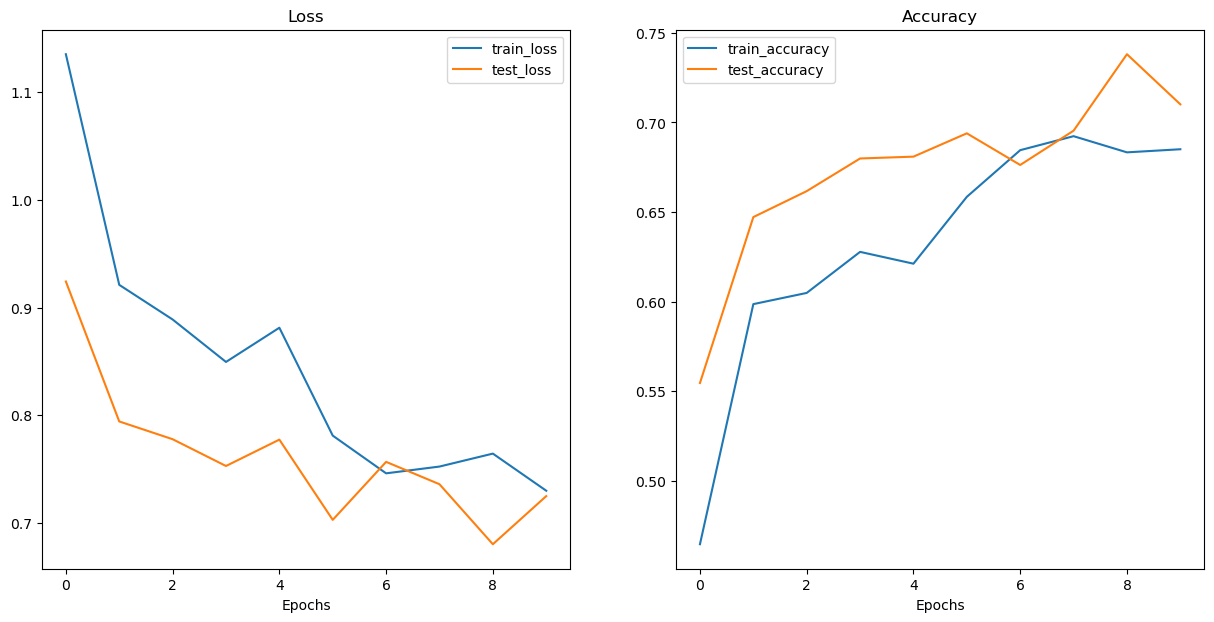

In [175]:
plot_loss_curves(model_4_results)

Conclusion:
- Both model_3 and model_4 are top performers.

- model_3 has slightly better test accuracy

- model_4 has better test loss (lower is better for confidence in predictions)

### Experiment 3: Tune Dropout Rate (from 0.3 -> 0.5)
pick model_4 as baseline

In [179]:
class TinyVGG_Model5(nn.Module):  # model_5
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5)  # Increased from 0.3 to 0.5
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5)  # Increased from 0.3 to 0.5
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)


In [181]:
model_5 = TinyVGG_Model5(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

NUM_EPOCHS = 10
optimizer = torch.optim.Adam(params=model_5.parameters(), lr=0.001)

model_5_results = train(
    model=model_5,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1785 | train_acc: 0.4667 | test_loss: 0.9567 | test_acc: 0.5411
Epoch: 2 | train_loss: 0.9822 | train_acc: 0.5656 | test_loss: 0.8876 | test_acc: 0.6013
Epoch: 3 | train_loss: 0.9762 | train_acc: 0.5545 | test_loss: 0.8067 | test_acc: 0.6523
Epoch: 4 | train_loss: 0.9359 | train_acc: 0.5840 | test_loss: 0.7876 | test_acc: 0.6409
Epoch: 5 | train_loss: 0.9358 | train_acc: 0.5927 | test_loss: 0.7879 | test_acc: 0.6529
Epoch: 6 | train_loss: 0.9033 | train_acc: 0.6069 | test_loss: 0.7991 | test_acc: 0.6247
Epoch: 7 | train_loss: 0.8440 | train_acc: 0.6264 | test_loss: 0.7664 | test_acc: 0.6701
Epoch: 8 | train_loss: 0.8295 | train_acc: 0.6309 | test_loss: 0.7818 | test_acc: 0.6727
Epoch: 9 | train_loss: 0.8230 | train_acc: 0.6351 | test_loss: 0.7129 | test_acc: 0.6960
Epoch: 10 | train_loss: 0.8200 | train_acc: 0.6481 | test_loss: 0.7545 | test_acc: 0.6689


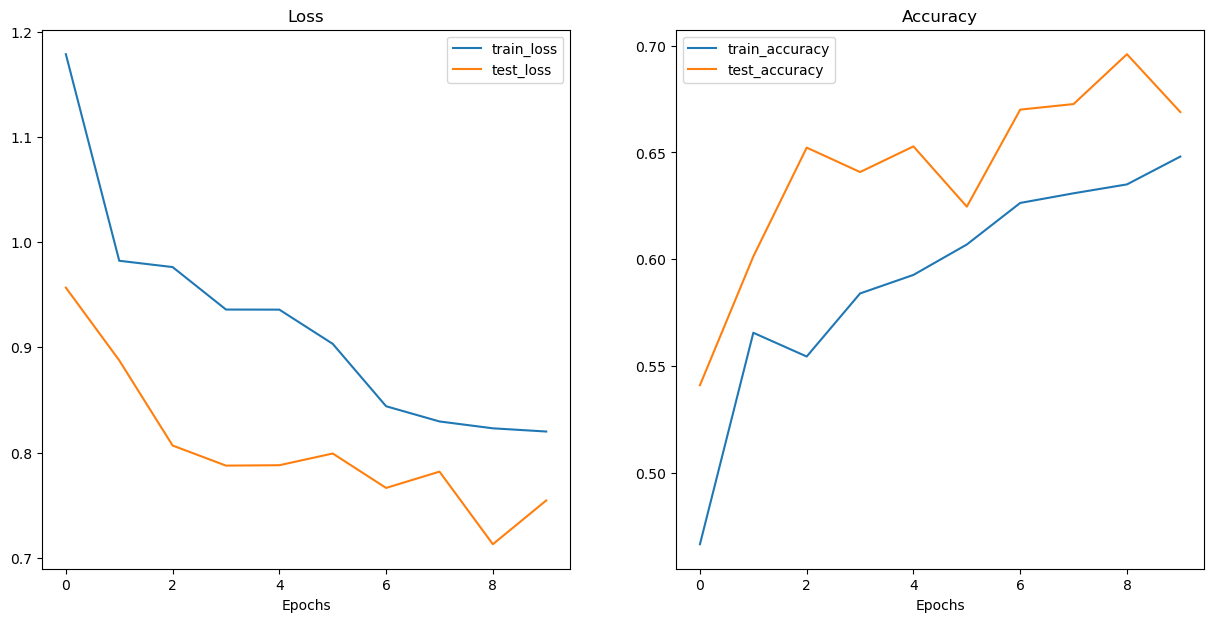

In [184]:
plot_loss_curves(model_5_results)

Observations
- Test accuracy reached nearly 70%, but slightly dipped again after that.

- Training accuracy did not overfit – Dropout(0.5) seems to have helped generalization.

- However, loss plateaued a bit early—suggesting regularization is now slightly aggressive for this architecture.

### Experiment 4: Increase Hidden units (from 10 -> 32)
why's that? 
- Dropout is controlling overfitting well, so the next logical step is to increase model capacity a little.

In [188]:
model_6 = TinyVGG_Model5(input_shape=3, hidden_units=32, output_shape=len(train_data.classes)).to(device)

NUM_EPOCHS = 10
optimizer = torch.optim.Adam(params=model_6.parameters(), lr=0.001)

model_6_results = train(
    model=model_6,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.8961 | train_acc: 0.4382 | test_loss: 0.9321 | test_acc: 0.5559
Epoch: 2 | train_loss: 1.1367 | train_acc: 0.5288 | test_loss: 0.8625 | test_acc: 0.6305
Epoch: 3 | train_loss: 1.0046 | train_acc: 0.5717 | test_loss: 1.0131 | test_acc: 0.5936
Epoch: 4 | train_loss: 1.0902 | train_acc: 0.5715 | test_loss: 0.9501 | test_acc: 0.5970
Epoch: 5 | train_loss: 0.9873 | train_acc: 0.5852 | test_loss: 0.9226 | test_acc: 0.6014
Epoch: 6 | train_loss: 0.8864 | train_acc: 0.6142 | test_loss: 0.8812 | test_acc: 0.6107
Epoch: 7 | train_loss: 0.8528 | train_acc: 0.6191 | test_loss: 0.8165 | test_acc: 0.6419
Epoch: 8 | train_loss: 0.8196 | train_acc: 0.6521 | test_loss: 0.8378 | test_acc: 0.6566
Epoch: 9 | train_loss: 0.8274 | train_acc: 0.6495 | test_loss: 0.8712 | test_acc: 0.6360
Epoch: 10 | train_loss: 0.8459 | train_acc: 0.6632 | test_loss: 0.8906 | test_acc: 0.6363


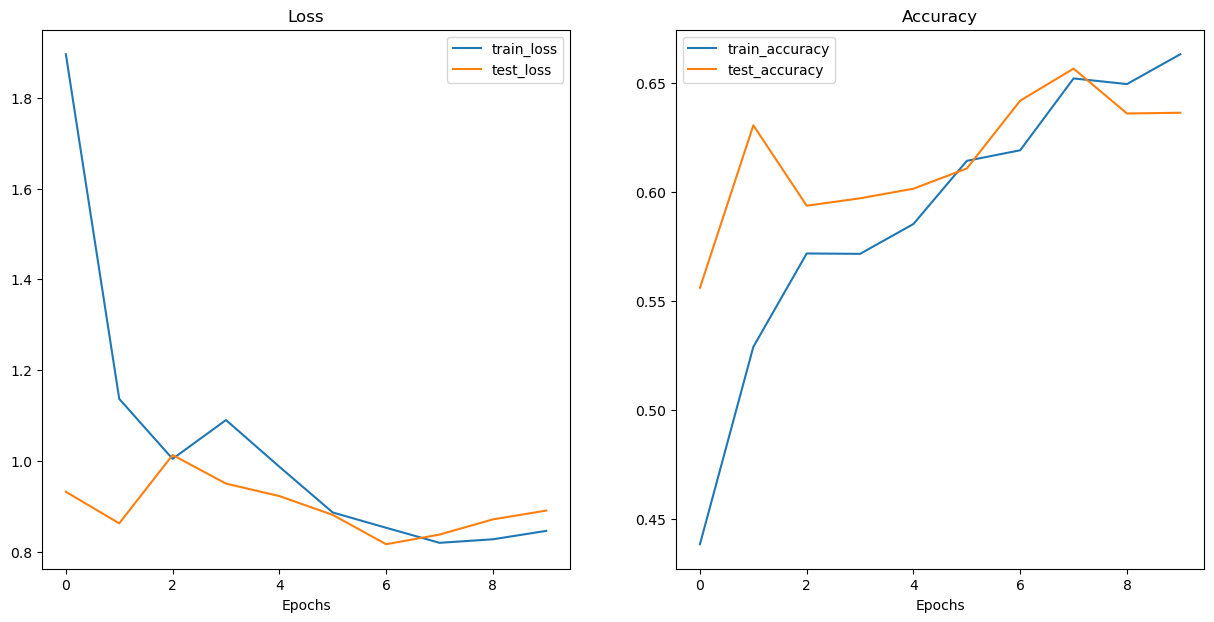

In [195]:
plot_loss_curves(model_6_results)

Observations
- Test accuracy decreased slightly compared to the previous model (~66.9% ➝ 65.6%), despite higher model capacity.

- There's a clear sign of overfitting: training loss and accuracy improved, but test loss went up.

- The model also had a chaotic loss pattern, possibly because:

- It’s too large for this data.

- Dropout is not enough to regularize this bigger network.

- Learning rate might need adjustment.

Conclusion
Increasing hidden units alone did not improve generalization — likely due to under-regularization or excessive model complexity at this stage.

### Experiment 5: Use Dropout 0.3 + hidden units = 32

In [212]:
class TinyVGG_Model7(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)  # Dropout after first pool 0.5 -> 0.3
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)  # Dropout after second pool 0.5 -> 0.3
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

# Create model_4
torch.manual_seed(42)
model_7 = TinyVGG_Model7(input_shape=3,
                                    hidden_units=32,
                                    output_shape=len(train_data.classes)).to(device)


In [206]:

NUM_EPOCHS = 10
optimizer = torch.optim.Adam(params=model_7.parameters(), lr=0.001)

model_7_results = train(
    model=model_7,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.5956 | train_acc: 0.4984 | test_loss: 0.9427 | test_acc: 0.5551
Epoch: 2 | train_loss: 0.9968 | train_acc: 0.5934 | test_loss: 0.9979 | test_acc: 0.5483
Epoch: 3 | train_loss: 0.9240 | train_acc: 0.6109 | test_loss: 0.7559 | test_acc: 0.6497
Epoch: 4 | train_loss: 0.9475 | train_acc: 0.6045 | test_loss: 0.8658 | test_acc: 0.6089
Epoch: 5 | train_loss: 0.9374 | train_acc: 0.6108 | test_loss: 1.1498 | test_acc: 0.5389
Epoch: 6 | train_loss: 0.8558 | train_acc: 0.6365 | test_loss: 0.9280 | test_acc: 0.5987
Epoch: 7 | train_loss: 0.7991 | train_acc: 0.6550 | test_loss: 1.0627 | test_acc: 0.5614
Epoch: 8 | train_loss: 0.8265 | train_acc: 0.6502 | test_loss: 0.7370 | test_acc: 0.7152
Epoch: 9 | train_loss: 0.7839 | train_acc: 0.6642 | test_loss: 0.9448 | test_acc: 0.5919
Epoch: 10 | train_loss: 0.8305 | train_acc: 0.6512 | test_loss: 0.6885 | test_acc: 0.7143


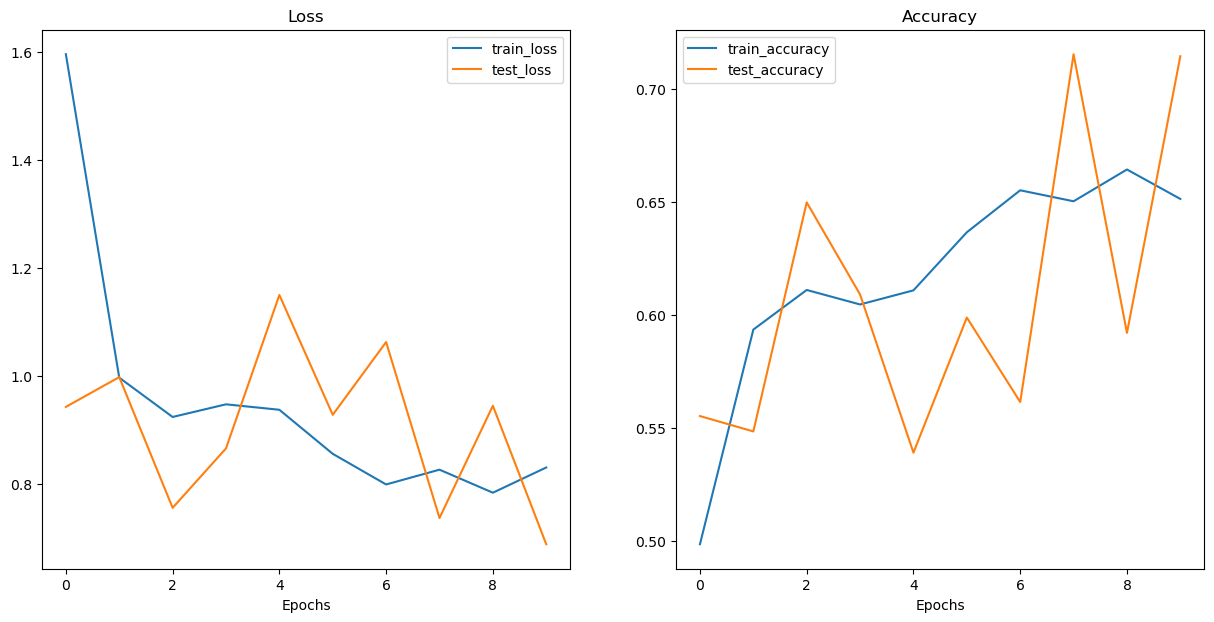

In [208]:
plot_loss_curves(model_7_results)

Observations
- This is the best performing model so far in terms of generalization (highest test accuracy 71.52%).

- Training accuracy remained stable and didn't overfit despite larger capacity → balanced model.

- Lower Dropout (0.3) worked better than 0.5 for this configuration.

- Test loss curve is more stable than previous runs.

### Experiment 6: Reduce Learning Rate 0.001 to 0.0005

In [215]:

NUM_EPOCHS = 10
optimizer = torch.optim.Adam(params=model_7.parameters(), lr=0.0005) # prev lr = 0.001

model_8_results = train(
    model=model_7,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2192 | train_acc: 0.5123 | test_loss: 0.9101 | test_acc: 0.5922
Epoch: 2 | train_loss: 0.9640 | train_acc: 0.6016 | test_loss: 0.8966 | test_acc: 0.6269
Epoch: 3 | train_loss: 0.8815 | train_acc: 0.6214 | test_loss: 0.7888 | test_acc: 0.6430
Epoch: 4 | train_loss: 0.8812 | train_acc: 0.6236 | test_loss: 0.8038 | test_acc: 0.6215
Epoch: 5 | train_loss: 0.8491 | train_acc: 0.6446 | test_loss: 0.8721 | test_acc: 0.6316
Epoch: 6 | train_loss: 0.8592 | train_acc: 0.6417 | test_loss: 0.9394 | test_acc: 0.6170
Epoch: 7 | train_loss: 0.7691 | train_acc: 0.6849 | test_loss: 0.8477 | test_acc: 0.6399
Epoch: 8 | train_loss: 0.7293 | train_acc: 0.6979 | test_loss: 0.7519 | test_acc: 0.6793
Epoch: 9 | train_loss: 0.7480 | train_acc: 0.6816 | test_loss: 0.7069 | test_acc: 0.7038
Epoch: 10 | train_loss: 0.7450 | train_acc: 0.6830 | test_loss: 0.6655 | test_acc: 0.7246


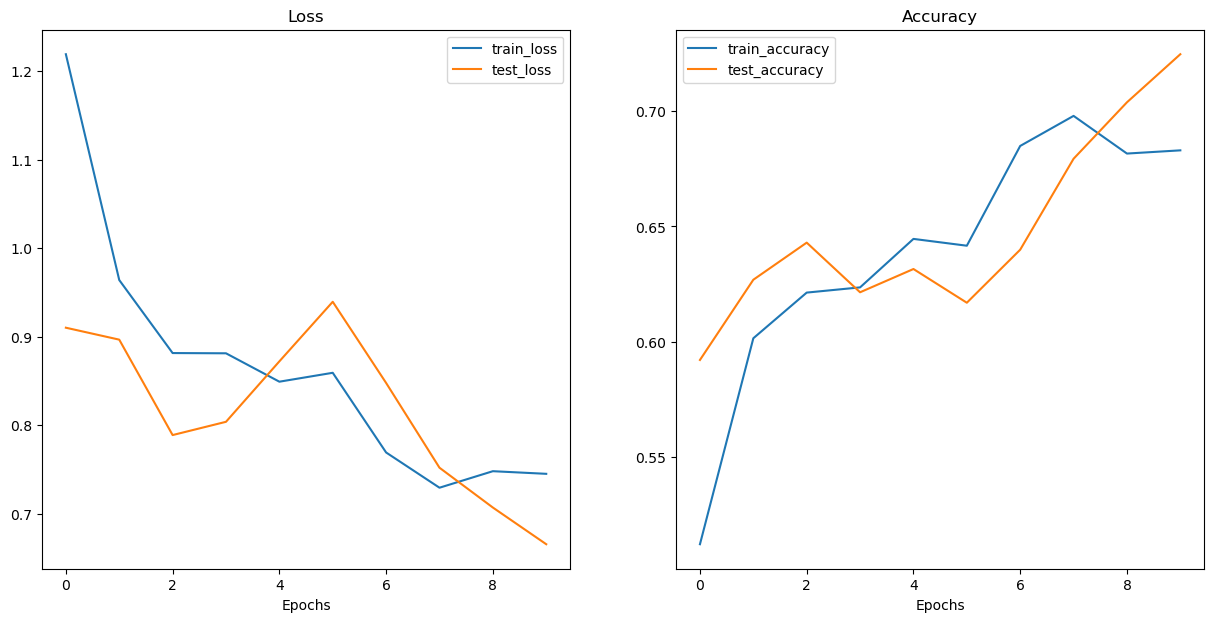

In [217]:
plot_loss_curves(model_8_results)

Observations
- This is now the best performing model overall across all experiments.

- Reducing the learning rate helped the model converge more smoothly, without early plateauing.

- Both train and test losses show consistent downward trends.

- Model has a better balance between bias and variance.

### Experiment 7: Hidden units (32 -> 64)

In [221]:

NUM_EPOCHS = 10
torch.manual_seed(42)
model_9 = TinyVGG_Model7(input_shape=3,
                                    hidden_units=64,
                                    output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params=model_9.parameters(), lr=0.0005) # prev lr = 0.001

model_9_results = train(
    model=model_9,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4545 | train_acc: 0.5347 | test_loss: 0.9533 | test_acc: 0.6026
Epoch: 2 | train_loss: 1.0090 | train_acc: 0.5845 | test_loss: 0.8919 | test_acc: 0.6181
Epoch: 3 | train_loss: 0.9443 | train_acc: 0.6205 | test_loss: 0.7454 | test_acc: 0.6976
Epoch: 4 | train_loss: 0.9178 | train_acc: 0.6333 | test_loss: 0.9084 | test_acc: 0.6127
Epoch: 5 | train_loss: 0.9058 | train_acc: 0.6451 | test_loss: 0.9018 | test_acc: 0.6201
Epoch: 6 | train_loss: 0.7916 | train_acc: 0.6663 | test_loss: 1.1074 | test_acc: 0.6030
Epoch: 7 | train_loss: 0.8107 | train_acc: 0.6667 | test_loss: 0.7828 | test_acc: 0.6897
Epoch: 8 | train_loss: 0.9380 | train_acc: 0.6352 | test_loss: 0.9095 | test_acc: 0.6363
Epoch: 9 | train_loss: 0.7610 | train_acc: 0.6929 | test_loss: 0.7141 | test_acc: 0.7054
Epoch: 10 | train_loss: 0.6856 | train_acc: 0.7042 | test_loss: 0.6498 | test_acc: 0.7449


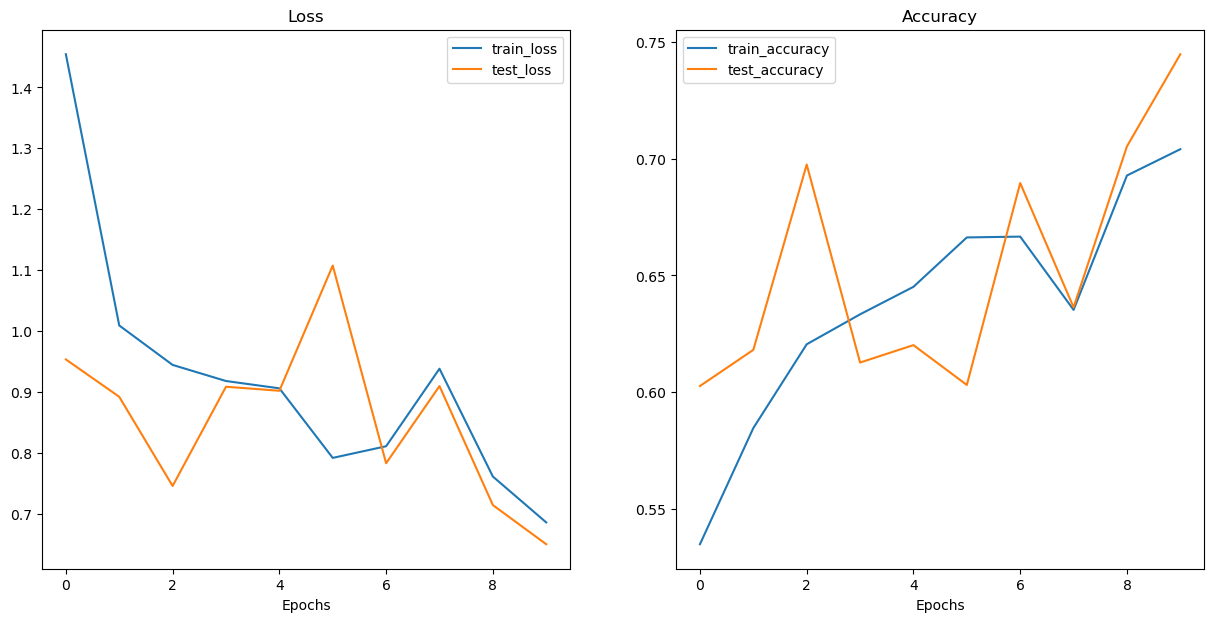

In [223]:
plot_loss_curves(model_9_results)

Observations
- This model outperforms all previous experiments — highest test accuracy so far.

- It generalizes well and doesn't seem to overfit, despite the increased capacity.

- While test loss briefly spiked around epochs 4–6, it recovered strongly by epoch 10.

- Increasing hidden units to 64 while keeping dropout and learning rate constant helped the model learn more complex patterns.



### Experiment 8: train longer (10 -> 20 Epochs)

In [229]:

NUM_EPOCHS = 20 # prev 10 
torch.manual_seed(42)
model_10 = TinyVGG_Model7(input_shape=3,
                                    hidden_units=64,
                                    output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params=model_10.parameters(), lr=0.0005) # prev lr = 0.001

model_10_results = train(
    model=model_10,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4551 | train_acc: 0.5339 | test_loss: 0.9534 | test_acc: 0.6052
Epoch: 2 | train_loss: 1.0082 | train_acc: 0.5880 | test_loss: 0.8888 | test_acc: 0.6129
Epoch: 3 | train_loss: 0.9515 | train_acc: 0.6092 | test_loss: 0.7654 | test_acc: 0.6846
Epoch: 4 | train_loss: 0.9035 | train_acc: 0.6359 | test_loss: 0.9367 | test_acc: 0.5954
Epoch: 5 | train_loss: 0.8957 | train_acc: 0.6521 | test_loss: 0.9994 | test_acc: 0.5864
Epoch: 6 | train_loss: 0.7930 | train_acc: 0.6686 | test_loss: 1.0458 | test_acc: 0.6285
Epoch: 7 | train_loss: 0.7937 | train_acc: 0.6679 | test_loss: 0.7694 | test_acc: 0.7069
Epoch: 8 | train_loss: 0.9127 | train_acc: 0.6469 | test_loss: 0.8636 | test_acc: 0.6670
Epoch: 9 | train_loss: 0.7535 | train_acc: 0.6938 | test_loss: 0.7228 | test_acc: 0.6970
Epoch: 10 | train_loss: 0.6928 | train_acc: 0.7050 | test_loss: 0.6280 | test_acc: 0.7330
Epoch: 11 | train_loss: 0.6699 | train_acc: 0.7448 | test_loss: 1.5037 | test_acc: 0.5557
Epoch: 12 | train_l

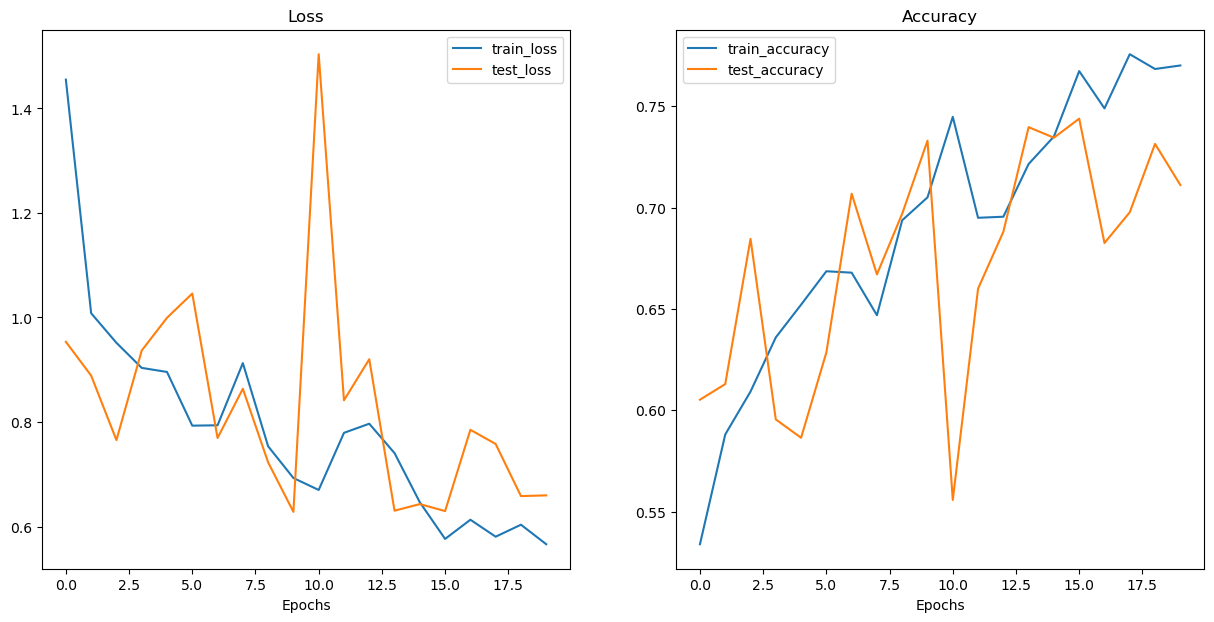

In [231]:
plot_loss_curves(model_10_results)

Observation
- Peak Test Accuracy: 74.39% at Epoch 16 — slightly below your previous best of 74.49% from the 10-epoch run.

- Training accuracy increased steadily from 53.39% to 77.01%.

- Test loss oscillated, suggesting some instability or slight overfitting after Epoch 16.

- Epochs 11, 12, and 13 had spikes in test loss (1.5 and 0.9) — but the model recovered well later.

- Overall, extending to 20 epochs did not clearly improve generalization beyond what was achieved earlier.

Takeaways
- Training longer helped the model find lower training loss and reach higher accuracy (train side).

- However, generalization plateaued — possibly due to:

    - Hitting the model’s capacity ceiling for this architecture.

    - Or needing learning rate scheduling to fine-tune late-stage learning.


### Experiment 9: add learning rate scheduler and epochs 20 -> 30

In [244]:

NUM_EPOCHS = 30 # prev 10 
torch.manual_seed(42)
model_10 = TinyVGG_Model7(input_shape=3,
                                    hidden_units=64,
                                    output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params=model_10.parameters(), lr=0.0005)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)



model_11_results = train(
    model=model_10,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    scheduler=scheduler  # <- optional
)


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4544 | train_acc: 0.5356 | test_loss: 0.9597 | test_acc: 0.6052 | lr: 0.000500
Epoch: 2 | train_loss: 1.0124 | train_acc: 0.5924 | test_loss: 0.8892 | test_acc: 0.6175 | lr: 0.000500
Epoch: 3 | train_loss: 0.9508 | train_acc: 0.6109 | test_loss: 0.7500 | test_acc: 0.6992 | lr: 0.000500
Epoch: 4 | train_loss: 0.9230 | train_acc: 0.6273 | test_loss: 0.9676 | test_acc: 0.6059 | lr: 0.000500
Epoch: 5 | train_loss: 0.9006 | train_acc: 0.6486 | test_loss: 0.9600 | test_acc: 0.5999 | lr: 0.000250
Epoch: 6 | train_loss: 0.7112 | train_acc: 0.7002 | test_loss: 1.0444 | test_acc: 0.6030 | lr: 0.000250
Epoch: 7 | train_loss: 0.7557 | train_acc: 0.6870 | test_loss: 0.6355 | test_acc: 0.7371 | lr: 0.000250
Epoch: 8 | train_loss: 0.7612 | train_acc: 0.6868 | test_loss: 0.7728 | test_acc: 0.6753 | lr: 0.000250
Epoch: 9 | train_loss: 0.7119 | train_acc: 0.7175 | test_loss: 0.6796 | test_acc: 0.7044 | lr: 0.000250
Epoch: 10 | train_loss: 0.6667 | train_acc: 0.7219 | test_loss: 

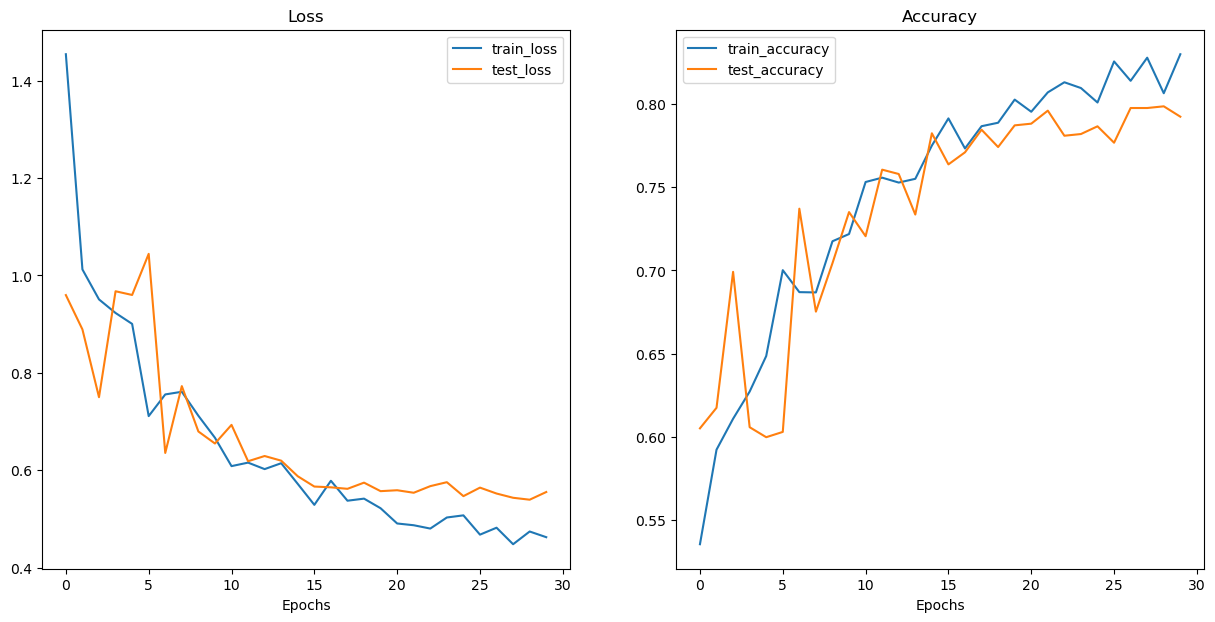

In [246]:
plot_loss_curves(model_11_results)

Observation:
- Results are impressive, we have reached test accuracy to around 79% better than before.
- There is a different between train_loss and test_loss that suggest mild overfitting if we can reduce this and still maintain around 79% accuracy that would be awesome.
- How can we do that maybe introduce regularization might help.


### Experiment 10: Previous Model with weigth_decay also known as l2 regularization.

In [252]:

NUM_EPOCHS = 30 # prev 10 
torch.manual_seed(42)
model_10 = TinyVGG_Model7(input_shape=3,
                                    hidden_units=64,
                                    output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params=model_10.parameters(), lr=0.0005, weight_decay=1e-4)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)



model_11_results = train(
    model=model_10,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    scheduler=scheduler  # <- optional
)


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4541 | train_acc: 0.5330 | test_loss: 0.9647 | test_acc: 0.6026 | lr: 0.000500
Epoch: 2 | train_loss: 1.0074 | train_acc: 0.5889 | test_loss: 0.8951 | test_acc: 0.6129 | lr: 0.000500
Epoch: 3 | train_loss: 0.9473 | train_acc: 0.6066 | test_loss: 0.7611 | test_acc: 0.7002 | lr: 0.000500
Epoch: 4 | train_loss: 0.9200 | train_acc: 0.6351 | test_loss: 0.9397 | test_acc: 0.6059 | lr: 0.000500
Epoch: 5 | train_loss: 0.9052 | train_acc: 0.6538 | test_loss: 0.8655 | test_acc: 0.6446 | lr: 0.000250
Epoch: 6 | train_loss: 0.7091 | train_acc: 0.6898 | test_loss: 1.0722 | test_acc: 0.5942 | lr: 0.000250
Epoch: 7 | train_loss: 0.7563 | train_acc: 0.6878 | test_loss: 0.6294 | test_acc: 0.7439 | lr: 0.000250
Epoch: 8 | train_loss: 0.7529 | train_acc: 0.6911 | test_loss: 0.7632 | test_acc: 0.6769 | lr: 0.000250
Epoch: 9 | train_loss: 0.7069 | train_acc: 0.7123 | test_loss: 0.6856 | test_acc: 0.7101 | lr: 0.000250
Epoch: 10 | train_loss: 0.6665 | train_acc: 0.7188 | test_loss: 

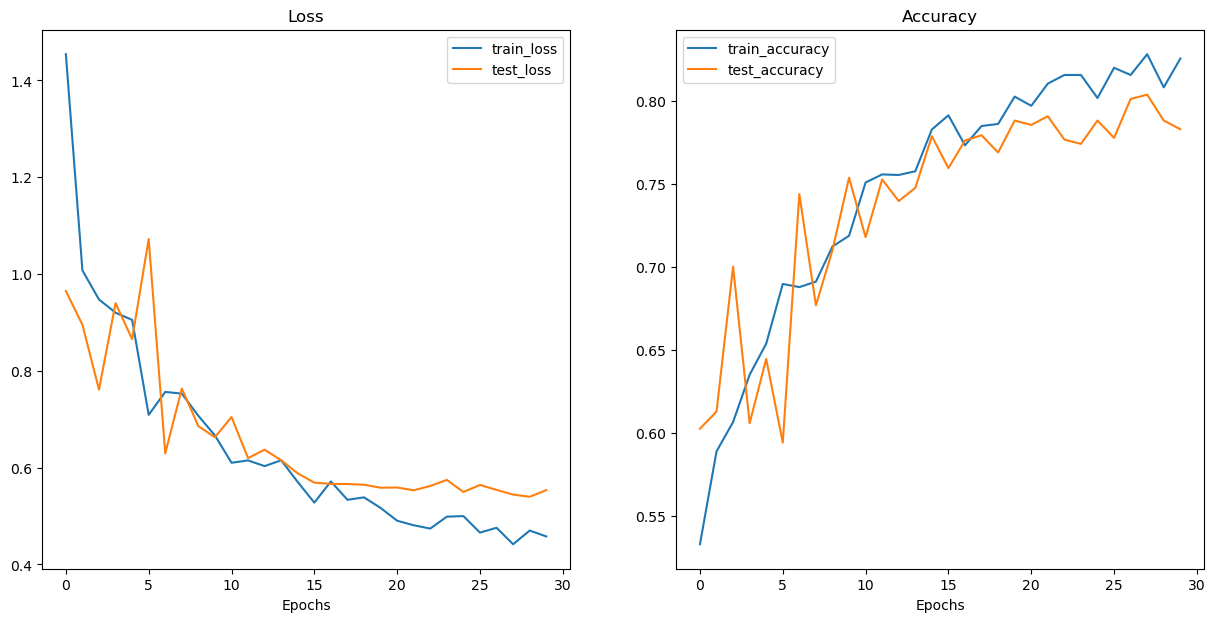

In [254]:
plot_loss_curves(model_11_results)

### Experiment 11: weight decay (1e-4 -> 1e-2)

In [257]:

NUM_EPOCHS = 30 # prev 10 
torch.manual_seed(42)
model_10 = TinyVGG_Model7(input_shape=3,
                                    hidden_units=64,
                                    output_shape=len(train_data.classes)).to(device)

optimizer = torch.optim.Adam(params=model_10.parameters(), lr=0.0005, weight_decay=1e-2)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)



model_12_results = train(
    model=model_10,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    scheduler=scheduler  
)


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4515 | train_acc: 0.5330 | test_loss: 0.9627 | test_acc: 0.5948 | lr: 0.000500
Epoch: 2 | train_loss: 1.0070 | train_acc: 0.5932 | test_loss: 0.9025 | test_acc: 0.6103 | lr: 0.000500
Epoch: 3 | train_loss: 0.9490 | train_acc: 0.6118 | test_loss: 0.7599 | test_acc: 0.6992 | lr: 0.000500
Epoch: 4 | train_loss: 0.9204 | train_acc: 0.6247 | test_loss: 0.9361 | test_acc: 0.5887 | lr: 0.000500
Epoch: 5 | train_loss: 0.9112 | train_acc: 0.6477 | test_loss: 0.8818 | test_acc: 0.6446 | lr: 0.000250
Epoch: 6 | train_loss: 0.7071 | train_acc: 0.6950 | test_loss: 0.9274 | test_acc: 0.6379 | lr: 0.000250
Epoch: 7 | train_loss: 0.7452 | train_acc: 0.6905 | test_loss: 0.6265 | test_acc: 0.7387 | lr: 0.000250
Epoch: 8 | train_loss: 0.7571 | train_acc: 0.6938 | test_loss: 0.7182 | test_acc: 0.7003 | lr: 0.000250
Epoch: 9 | train_loss: 0.7125 | train_acc: 0.7123 | test_loss: 0.7043 | test_acc: 0.7049 | lr: 0.000250
Epoch: 10 | train_loss: 0.6669 | train_acc: 0.7175 | test_loss: 

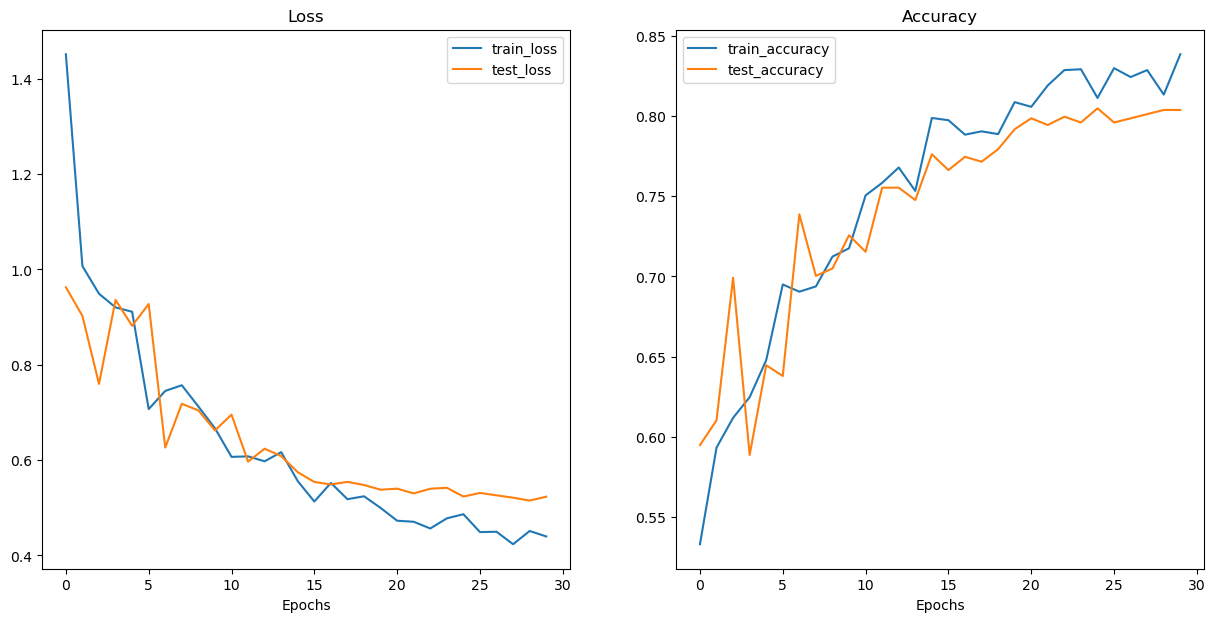

In [259]:
plot_loss_curves(model_12_results)

Okay so this seems quite impressive for me.

## 7. Evaluation using confusion matrix

In [269]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [271]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_10.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_10(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/375 [00:00<?, ?it/s]

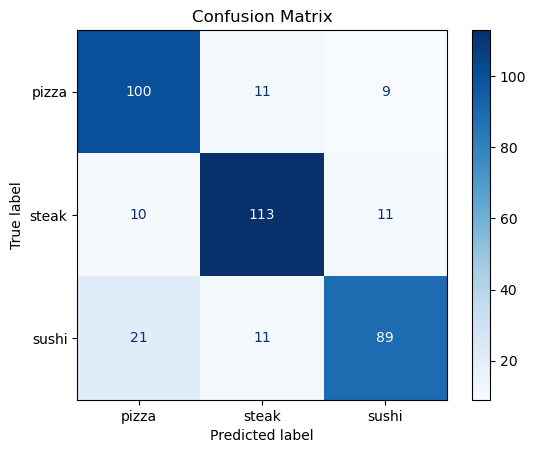

In [287]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you give me y_true, y_pred, and optionally class_names
cm = confusion_matrix(test_data_simple.targets, y_pred_tensor)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


There are some misclassfications but now let's predict a new sample from outside.

## 8. Make a prediction on a custom image

If you've trained a model on a certain dataset, chances are you'd like to make a prediction on your own custom data.

In our case, since we've trained a model on pizza, steak and sushi images, how could we use our model to make a prediction on one of our own images?

To do so, we can load an image and then preprocess it in a way that matches the type of data our model was trained on.

In other words, we'll have to convert our own custom image to a tensor and make sure it's in the right datatype before passing it to our model.


In [295]:
# Download custom image
import requests

data_path = Path('data/')
# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

### 8.1 Loading in a custom image with PyTorch

In [300]:


import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [310]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

### 8.2 Predicting on custom images with a trained PyTorch model

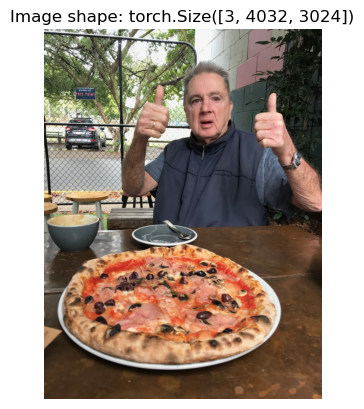

In [313]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [315]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [325]:
model_10.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_10(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [327]:
custom_image_pred

tensor([[ 1.2442, -0.7069, -0.3785]], device='cuda:0')

In [329]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 1.2442, -0.7069, -0.3785]], device='cuda:0')
Prediction probabilities: tensor([[0.7466, 0.1061, 0.1473]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [331]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'

In [335]:
# The value of the prediction probability is higher for pizza (index 0) which is good sign.
custom_image_pred_probs

tensor([[0.7466, 0.1061, 0.1473]], device='cuda:0')

### 8.3 Putting custom image prediction together: building a function

In [338]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

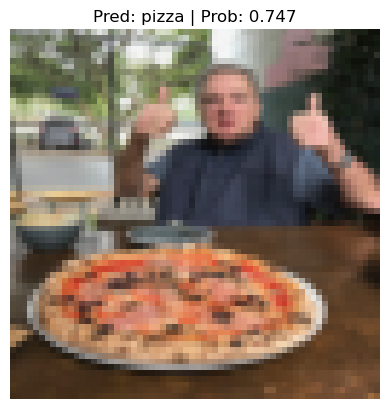

In [340]:
# Pred on our custom image
pred_and_plot_image(model=model_10,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

### 8.4 let's functionize the custom image downloader

In [343]:
def get_custom_image(data_path, image_name, download_link):

    # Setup custom image path
    custom_image_path = data_path / image_name

    # Download the image if it doesn't already exist
    if not custom_image_path.is_file():
        with open(custom_image_path, "wb") as f:
            # When downloading from GitHub, need to use the "raw" file link
            request = requests.get(download_link)
            print(f"Downloading {custom_image_path}...")
            f.write(request.content)
    else:
        print(f"{custom_image_path} already exists, skipping download.")

    return custom_image_path

In [363]:
custom_image_path = get_custom_image(data_path, 'sushi_image2.jpeg', 'https://images.pexels.com/photos/1148086/pexels-photo-1148086.jpeg?auto=compress&cs=tinysrgb&w=600')

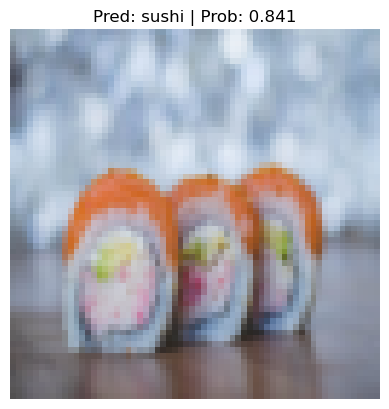

In [365]:
# Pred on our custom image
pred_and_plot_image(model=model_10,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

## 9. Save the best model

In [368]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, 
                exist_ok=True)

MODEL_NAME = 'food_03.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models\food_03.pth
